In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Load dataset and display the fourth face in the dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)

In [ ]:
X = lfw_people.data
y = lfw_people.target

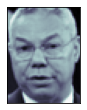

In [ ]:
# displaying the image at index 3
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(3, 5, 1, xticks=[], yticks=[])
ax.imshow(lfw_people.images[3], cmap=plt.cm.bone)

Compute the mean of all the examples in the dataset. Display the mean image calculated in step 2.

(<matplotlib.image.AxesImage at 0x7fe87c1d0430>, Text(0.5, 1.0, 'Mean Image'))

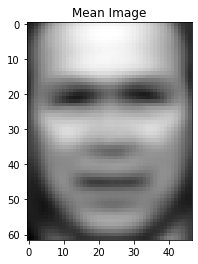

In [ ]:
X_m = np.mean(X, axis = 0) # mean
plt.imshow(X_m.reshape(62, 47), cmap = plt.cm.gray), plt.title('Mean Image') # displaying the mean image

Do dimensionality reduction with either of the pca algorithms you implemented

In [ ]:
X_meaned = X - np.mean(X , axis = 0) # centering the data

In [ ]:
u, s, v = np.linalg.svd(X_meaned)  # performing pca using svd

Compute the 5 top principal components and print them

In [ ]:
for i in range(5):
  print(v.T[:, i])

[-0.00750877 -0.00812394 -0.00893856 ... -0.01415705 -0.01228611
 -0.01032105]
[-0.01736775 -0.01625778 -0.01584153 ...  0.03365867  0.03306131
  0.03161871]
[0.02008713 0.01817848 0.01725674 ... 0.03870662 0.03452758 0.03226309]
[0.03030667 0.03257753 0.03441757 ... 0.0316022  0.02888925 0.02280479]
[ 0.00905503  0.00954557  0.01001607 ... -0.09149976 -0.0837678
 -0.0732807 ]


What are the values of the associated 5 attributes of the fourth image in the dataset?

In [ ]:
num_components = 5
X_transformed = X_meaned @ v[:num_components,:].T

In [ ]:
print(X_transformed[3])

[ 0.9314171   1.0077626  -1.5906527   0.27616894  0.19711503]


Project the fourth face in the dataset onto the first 5 principal components.

(<matplotlib.image.AxesImage at 0x7fe8a6d80be0>,
 Text(0.5, 1.0, 'Image in new face space'))

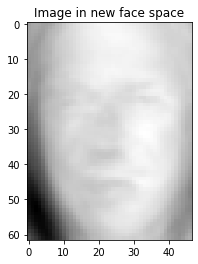

In [ ]:
# projecting and printing the fourth image
_, h, w = lfw_people.images.shape
reconst0 = X_transformed[3] @ v[: num_components, :]
plt.imshow(reconst0.reshape(h, w), cmap = plt.cm.gray), plt.title('Image in new face space')

Project the fourth face with first 5 principal components back into the original image
space, and then display it.

In [ ]:
# Getting the original image space
W5 = v.T[:, :5]
X_prime = np.dot(X_transformed,W5.T)  + np.mean(X, axis=0)

In [ ]:
print(X_prime.shape)

(1288, 2914)


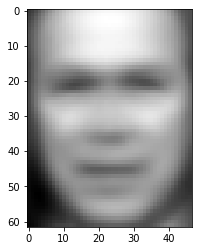

In [ ]:
plt.imshow(X_prime[3].reshape(h, w), cmap = plt.cm.gray)